# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import sys
sys.path.append('/home/chayan/UMINTFS/')

import umap
import random
import numpy as np
import pandas as pd
from utills import umint
from utills import datasets as ds

# Loading Data

In [2]:
dataname = 'cbmc8k'
x1, x2, y = ds.LoadData(dataname)

In [3]:
x1.head()

,A4GALT,ABCB10,ABCC3,ABCG2,ABI3,AC002454.1,AC004381.6,AC004791.2,AC005339.2,AC005356.1,...,MOUSE-Rtn4,MOUSE-Ppp1ca,MOUSE-Cald1,MOUSE-Rps26,MOUSE-Ctsl,MOUSE-Tnfrsf12a,MOUSE-Esd,MOUSE-Acta2,MOUSE-Arpc2,MOUSE-Calr
CTGTTTACACCGCTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.701941,0.723720,0.813318,0.522753,0.800646,0.800112,0.705251,0.203630,0.808490,0.527913
CTCTACGGTGTGGCTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.660916,0.817508,0.672634,0.686815,0.673267,0.758410,0.712368,0.541833,0.724125,0.586252
AGCAGCCAGGCTCATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.726985,0.837928,0.687397,0.698660,0.752412,0.838036,0.600332,0.412726,0.795093,0.765478
GAATAAGAGATCCCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.705463,0.824022,0.671555,0.747427,0.642838,0.702704,0.732823,0.419711,0.755683,0.817017
GTGCATAGTCATGCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.683721,0.921567,0.777735,0.715994,0.491080,0.657864,0.428792,0.885118,0.890060,0.609801


In [4]:
x2.head()

,CD3,CD4,CD8,CD45RA,CD56,CD16,CD11c,CD14,CD19,CD34
CTGTTTACACCGCTAG,0.106969,0.148856,0.108512,0.227909,0.120278,0.365585,0.153699,0.368842,0.135703,0.447006
CTCTACGGTGTGGCTC,0.078557,0.084523,0.073025,0.571999,0.109627,0.231799,0.116187,0.202995,0.555313,0.205243
AGCAGCCAGGCTCATT,0.157329,0.225018,0.091061,0.264110,0.161577,0.293015,0.136911,0.320201,0.154963,0.240348
GAATAAGAGATCCCAT,0.139480,0.192626,0.115261,0.219731,0.153280,0.290085,0.131533,0.356361,0.137720,0.334845
GTGCATAGTCATGCAT,0.102479,0.150629,0.120622,0.231560,0.169183,0.352295,0.164698,0.278558,0.142276,0.372073


In [5]:
y.head()

,rna_annotations
CTGTTTACACCGCTAG,Mouse
CTCTACGGTGTGGCTC,Mouse
AGCAGCCAGGCTCATT,Mouse
GAATAAGAGATCCCAT,Mouse
GTGCATAGTCATGCAT,Mouse


# Proposed UMINT architecture
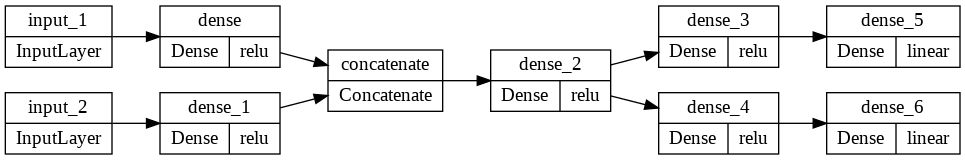

# Parameters

In [6]:
data = [x1, x2]
hid_neuron = [128, 10]
mid_neuron = 64
lambda_act = 0.0001
lambda_weight = 0.001
bs=16
epochs=25
verbose=0

# UMINT

In [7]:
model, encoder, decoder = umint.UMINT.train_umint(data, hid_neuron, mid=mid_neuron, lambda_act=lambda_act,
                                                  bs=bs, epochs=epochs, lambda_weight=lambda_weight,
                                                  verbose=verbose)

# Saving models for feature selection

In [8]:
model.save("UMINT_"+dataname+".h5")
encoder.save("UMINT_encoder_"+dataname+".h5")
decoder.save("UMINT_decoder_"+dataname+".h5")

# Embeddings (UMINT, UMINT+UMAP) 

In [9]:
low = encoder.predict(data)
low_umap = umap.UMAP().fit_transform(low)

270/270 [==============================] - 0s 1ms/step


# Saving embeddings

In [10]:
pd.DataFrame(low).to_csv('UMINT_'+dataname+'.csv')
pd.DataFrame(low_umap).to_csv('UMAP_UMINT_'+dataname+'.csv')